# Thực hiện phân tích dữ liệu

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from PIL import Image, ImageDraw

In [4]:
dataset_path = '/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/data'

In [13]:
train = pd.read_csv(f'{dataset_path}/train_medata.csv')
test = pd.read_csv(f'{dataset_path}/test_medata.csv')
valid = pd.read_csv(f'{dataset_path}/valid_medata.csv')

df = pd.concat([train, test, valid])

In [9]:
train

id                      img_dir  img_w  \
0     b68bac8ddba798394def18ac3b579f13   Hemiptera/18e4576cb4bc.jpg   2048   
1     a6cd9b373df4463f8fa2cb31a05eef88   Hemiptera/e99f1c76abc2.jpg   1581   
2     cd987ee6d92f1da7f13bcc66d20964a3   Hemiptera/6ec447717556.jpg   1859   
3     7363531f78853b856f8cb7ba49ec5f87   Hemiptera/8b77bce97de3.jpg    961   
4     8ea70cb8e19e56d502e780346ccb4eb7   Hemiptera/765bf050baeb.jpg   1152   
...                                ...                          ...    ...   
4487  17f16ef74ec81e6d2779adad8ae9565a  Coleoptera/20b1d98a58c8.jpg   2048   
4488  8f8c3a3d50d445a4de45eba0c8a9dd3f  Coleoptera/cb7a1b549351.jpg    853   
4489  e8458379b37fcd578a36a2c1acc3a002  Coleoptera/9b3377dc5805.jpg    814   
4490  e0550901da78fe5eb2f00c7ad1b52612  Coleoptera/92d8ce2f3edd.jpg   4608   
4491  2644a82256a5e36fe5e52e69d502a7c5   Hemiptera/3cc2d98a9d68.jpg   1852   

      img_h            x           y            w           h     sp_type  \
0      1365   607.337931  545.743886   926.543448  527.065217   Hemiptera   
1      1581    65.117816  455.824713  1443.192529  822.301724   Hemiptera   
2      1859    92.593870  646.376437  1632.857280  698.015326   Hemiptera   
3       961   155.564176  236.568008   652.633142  464.851533   Hemiptera   
4      1152    50.758621  400.551724  1028.413793  467.862069   Hemiptera   
...     ...          ...         ...          ...         ...         ...   
4487   1365   419.197795  507.552029  1311.228119  662.032058  Coleoptera   
4488    591   215.748449  106.245849   263.953825  291.089552  Coleoptera   
4489    588   166.822470  126.724138   427.561246  353.137931  Coleoptera   
4490   3072  1908.620262  990.130300   984.479669  927.635988  Coleoptera   
4491   1186   738.245517  218.684708   362.736552  633.214209   Hemiptera   

            xc        yc  bb_height  bb_width   bb_left    bb_top  \
0     0.522759  0.592877   0.386128  0.452414  0.296552  0.399812   
1     0.497605  0.548372   0.520115  0.912835  0.041188  0.288314   
2     0.488985  0.535441   0.375479  0.878352  0.049808  0.347701   
3     0.501437  0.488027   0.483716  0.679119  0.161877  0.246169   
4     0.490421  0.550766   0.406130  0.892720  0.044061  0.347701   
...        ...       ...        ...       ...       ...       ...   
4487  0.524810  0.614336   0.485005  0.640248  0.204686  0.371833   
4488  0.407650  0.426042   0.492537  0.309442  0.252929  0.179773   
4489  0.467571  0.515805   0.600575  0.525260  0.204942  0.215517   
4490  0.521020  0.473290   0.301965  0.213646  0.414197  0.322308   
4491  0.496552  0.451342   0.533907  0.195862  0.398621  0.184388   

      sp_type_binary  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
4487               1  
4488               1  
4489               1  
4490               1  
4491               0  

[4492 rows x 16 columns]

Xem số lượng của dữ liệu của từng tập dữ liệu.

In [6]:
dataframes = [train, test, valid, df]
labels = ['Train', 'Test', 'Valid', 'Full']

# Đếm số lượng dữ liệu trong mỗi DataFrame
counts = [len(df) for df in dataframes]

# Vẽ biểu đồ bar với Plotly
fig = px.bar(x=labels, y=counts, labels={'x': 'DataFrame', 'y': 'Number of Records'}, title='Comparison of Record Counts in Each DataFrame')

# Thêm màu sắc cho từng cột
fig.update_traces(marker_color=['crimson', 'LightSeaGreen', 'green', 'MidnightBlue'], text=counts, textposition='outside')

# Hiển thị biểu đồ
fig.show()

In [7]:
colors = {
    "Hemiptera": "LightSeaGreen", 
    "Coleoptera": "MidnightBlue"
}

Với mỗi tập dữ liệu, xem có bao nhiêu ảnh cho từng lớp

In [15]:
# Định nghĩa ánh xạ từ số thành tên
classes_num = [0, 1]
classes_name = ["Hemiptera", "Coleoptera"]
class_mapping = dict(zip(classes_name, classes_num))

# Thay đổi giá trị trong cột 'sp_type' theo ánh xạ
train['sp_type_binary'] = train['sp_type'].map(class_mapping)
test['sp_type_binary'] = test['sp_type'].map(class_mapping)
valid['sp_type_binary'] = valid['sp_type'].map(class_mapping)
df['sp_type_binary'] = df['sp_type'].map(class_mapping)

# Tạo bảng phân phối của 'sp_type' cho từng DataFrame
train_counts = train['sp_type'].value_counts()
test_counts = test['sp_type'].value_counts()
valid_counts = valid['sp_type'].value_counts()
df_counts = df['sp_type'].value_counts()


# Tạo các biểu đồ con (subplots)
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("Train", "Test", "Valid", "Full"), x_title='Spieces', y_title='Count',
                    vertical_spacing=0.1)

shown_legend = {class_name: False for class_name in classes_name}

# Vẽ biểu đồ bar cho từng DataFrame và hiển thị giá trị trên từng cột
for class_name in classes_name:
    fig.add_trace(go.Bar(
        x=[class_name], 
        y=[train_counts.get(class_name, 0)], 
        name=class_name, 
        marker_color=colors[class_name],
        text=[train_counts.get(class_name, 0)],  # Hiển thị giá trị trên cột
        textposition='outside',
        showlegend=not shown_legend[class_name]  # Chỉ hiển thị legend một lần cho mỗi lớp
    ), row=1, col=1)
    
    fig.add_trace(go.Bar(
        x=[class_name], 
        y=[test_counts.get(class_name, 0)], 
        name=class_name, 
        marker_color=colors[class_name],
        text=[test_counts.get(class_name, 0)],  # Hiển thị giá trị trên cột
        textposition='outside',
        showlegend=False  # Không hiển thị legend cho các biểu đồ sau
    ), row=1, col=2)
    
    fig.add_trace(go.Bar(
        x=[class_name], 
        y=[valid_counts.get(class_name, 0)], 
        name=class_name, 
        marker_color=colors[class_name],
        text=[valid_counts.get(class_name, 0)],  # Hiển thị giá trị trên cột
        textposition='outside',
        showlegend=False  # Không hiển thị legend cho các biểu đồ sau
    ), row=2, col=1)
    
    fig.add_trace(go.Bar(
        x=[class_name], 
        y=[df_counts.get(class_name, 0)], 
        name=class_name, 
        marker_color=colors[class_name],
        text=[df_counts.get(class_name, 0)],  # Hiển thị giá trị trên cột
        textposition='outside',
        showlegend=False,  # Không hiển thị legend cho các biểu đồ sau
    ), row=2, col=2)
    
    # Đánh dấu lớp này đã được thêm vào legend
    shown_legend[class_name] = True

# Cập nhật bố cục
fig.update_layout(
    title="Distribution of classes in Train, Test, and Valid DataFrames",
    showlegend=True,
    width=1200,  # Adjust the overall width
    height=1000   # Adjust the overall height
)


# Ẩn các giá trị trên trục x và y
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.update_traces(width=.7)


# Hiển thị biểu đồ
fig.show()

### Image resolution

In [31]:
import glob
import json

# Find all .vott files in the specified directory
pfiles = glob.glob(f'{dataset_path}/**/*.vott', recursive=True)

# List to hold individual DataFrames
dataframes = []

# Iterate through each found file
for f in pfiles:
    with open(f) as file:
        pdata = json.load(file)
        # Append the DataFrame for the current file to the list
        dataframes.append(pd.DataFrame(list(pdata['assets'].values())))

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Clean the 'path' column
df['path'] = df['path'].str.replace('file:F:/ArTaxOr/', '')

# Display the first few rows
df.head()


format                                id              name  \
0    jpg  b6a4906a7262e6e95949da861af489f6  000887d8cacc.jpg   
1    jpg  e767302f79a3be744a03e6094349efa0  0036742ac4ec.jpg   
2    jpg  c4fdca48d277d8a0bb2661d6e0f86e1d  0054a14fd144.jpg   
3    jpg  bcda0170e96c7878e024d8ae096eb732  00600a41bcaf.jpg   
4    jpg  41bec84e0c244dc87dd9c4eecb2bc9f8  007d652de198.jpg   

                         path                             size  state  type  
0  Hemiptera/000887d8cacc.jpg  {'width': 2048, 'height': 1383}      2     1  
1  Hemiptera/0036742ac4ec.jpg    {'width': 897, 'height': 647}      2     1  
2  Hemiptera/0054a14fd144.jpg  {'width': 1636, 'height': 1220}      2     1  
3  Hemiptera/00600a41bcaf.jpg  {'width': 1535, 'height': 2048}      2     1  
4  Hemiptera/007d652de198.jpg  {'width': 2048, 'height': 1315}      2     1

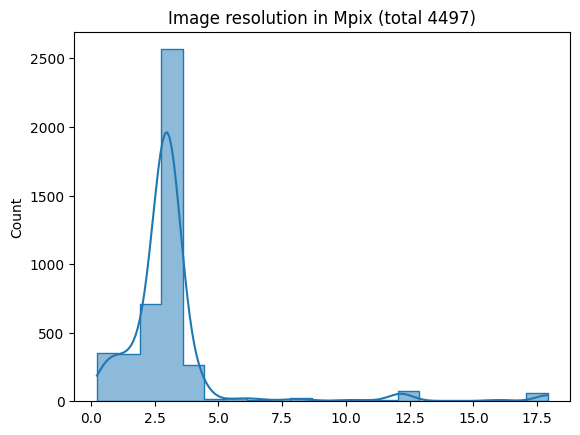

In [32]:
ps=np.zeros(len(df))
for i in range(len(df)):
    ps[i]=df['size'][i]['width'] * df['size'][i]['height']/1e6
sns.histplot(ps, bins=21, kde=True, element="step").set_title('Image resolution in Mpix (total {})'.format(len(df)));

In [30]:
tags=pd.DataFrame(list(pdata['tags']))
tags = tags[tags['name'].isin(['Coleoptera', 'Hemiptera'])].reset_index(drop=True)
pattern=r'[A-Z]'
labels=tags[tags.name.str.match(pattern)]
labels

name    color
0  Coleoptera  #e81123
1   Hemiptera  #257ffe

In [ ]:
annotations = []  # Initialize an empty list to store annotations

# Loop through the rows of the DataFrame `df`
for i in range(len(df)):
    # Extract the base directory from the `path` column
    p = df['path'][i].split('/')
    p = p[0]  # Keep only the first part of the split path
    
    # Construct the path to the annotation file
    afile = f'{dataset_path}/' + p + '/annotations/' + df['id'][i] + '-asset.json'
    
    # Check if the annotation file exists
    if os.path.isfile(afile):
        # Open and read the JSON annotation file
        with open(afile) as file:
            adata = json.load(file)
        
        # Extract the image resolution (width and height)
        xres, yres = adata['asset']['size']['width'], adata['asset']['size']['height']
        
        # Loop through all regions (bounding boxes) in the annotation data
        for j in range(len(adata['regions'])):
            # Normalize the height and width of the bounding box
            h = adata['regions'][j]['boundingBox']['height'] / yres
            w = adata['regions'][j]['boundingBox']['width'] / xres
            
            # Extract tags for the current region
            tags = adata['regions'][j]['tags']
            
            # Check if the primary tag matches specific classes of interest
            if tags[0] in ["Coleoptera", "Hemiptera"]:
                
                # Create a dictionary for the current annotation
                annotation = {
                    'label': tags[0],  # Primary label (e.g., "Coleoptera")
                    'label_idx': labels[labels['name'] == tags[0]].index[0],  # Index of the label in the labels DataFrame
                    'xres': xres,  # Image width (resolution)
                    'yres': yres,  # Image height (resolution)
                    'height': h,  # Normalized bounding box height
                    'width': w,  # Normalized bounding box width
                    'left': adata['regions'][j]['boundingBox']['left'] / xres,  # Normalized left coordinate
                    'top': adata['regions'][j]['boundingBox']['top'] / yres,  # Normalized top coordinate
                    'right': adata['regions'][j]['boundingBox']['left'] / xres + w,  # Normalized right coordinate
                    'bottom': adata['regions'][j]['boundingBox']['top'] / yres + h,  # Normalized bottom coordinate
                    'area': h * w,  # Area of the bounding box (normalized)
                    'xcenter': adata['regions'][j]['boundingBox']['left'] / xres + 0.5 * w,  # Normalized x-center
                    'ycenter': adata['regions'][j]['boundingBox']['top'] / yres + 0.5 * h,  # Normalized y-center
                    'blurred': int(any(ele == '_blurred' for ele in tags)),  # Check if '_blurred' tag is present
                    'occluded': int(any(ele == '_occluded' for ele in tags)),  # Check if '_occluded' tag is present
                    'truncated': int(any(ele == '_truncated' for ele in tags)),  # Check if '_truncated' tag is present
                    'file': adata['asset']['path'].replace('file:F:/ArTaxOr/', ''),  # File path (adjusted)
                    'id': adata['asset']['id'],  # Unique ID of the asset
                }
                
                # Append the annotation to the list
                annotations.append(annotation)

# Convert the list of annotations to a DataFrame
anno = pd.DataFrame(annotations)


let's take a look at how the object size (relative image size) distribution compares between labels:

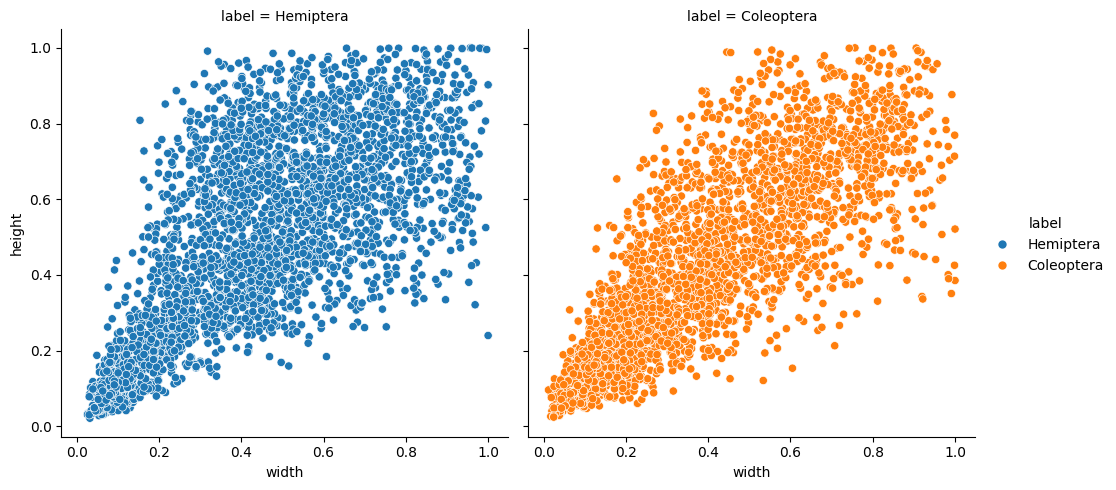

In [35]:
sns.relplot(x="width", y="height", hue="label", col="label", data=anno)

How are the centers of each object distributed?

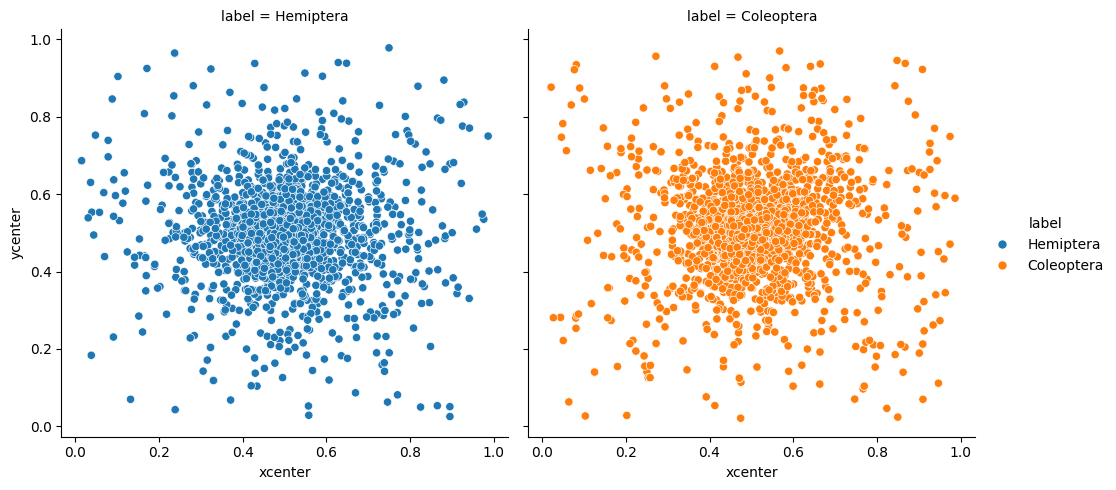

In [36]:
sns.relplot(x="xcenter", y="ycenter", hue="label", col="label", data=anno)

The violin plot gives another view on object size distribution:

<Axes: xlabel='label', ylabel='area'>

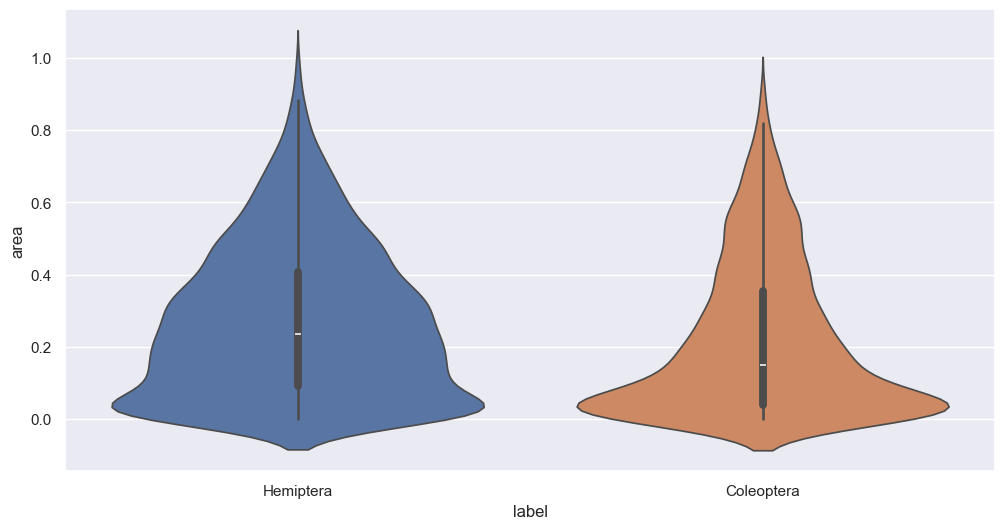

In [37]:
sns.set(rc={'figure.figsize':(12,6)})
sns.violinplot(x='label', y='area', hue="label", data=anno)

### Image exploration

In [ ]:
def attribution(fname):
    img = Image.open(fname)
    exif_data = img._getexif()
    img.close()
    if len(exif_data[315]) > 0:
        s='Photo: '+exif_data[315]
    else:
        s=exif_data[37510][8:].decode('ascii')
    return s

def plot_img(axes, idf, highlight=True):
    p = idf.iloc[0].file.split('/')
    f = f'{dataset_path}/'+'/'.join(p)
    im = Image.open(f)
    im.thumbnail((300,300),Image.LANCZOS)
    draw = ImageDraw.Draw(im)
    xres, yres = im.size[0], im.size[1]
    for i in range(len(idf)):
        if highlight==True:
            color=(255, 0, 0) if i == 0 else (128, 128, 128)          
        else:
            color=labels[labels.name == idf.iloc[i].label].color.iloc[0]
        draw.rectangle([int(idf.iloc[i]['left']*xres),
                        int(idf.iloc[i]['top']*yres),
                        int(idf.iloc[i]['right']*xres),
                        int(idf.iloc[i]['bottom']*yres)], outline=color, width=2)
    plt.setp(axes, xticks=[], yticks=[])
    axes.set_title(idf.iloc[0].label+'\n'+attribution(f))
    plt.imshow(im)

For each label, view the images that have the largest objects (relative image size).

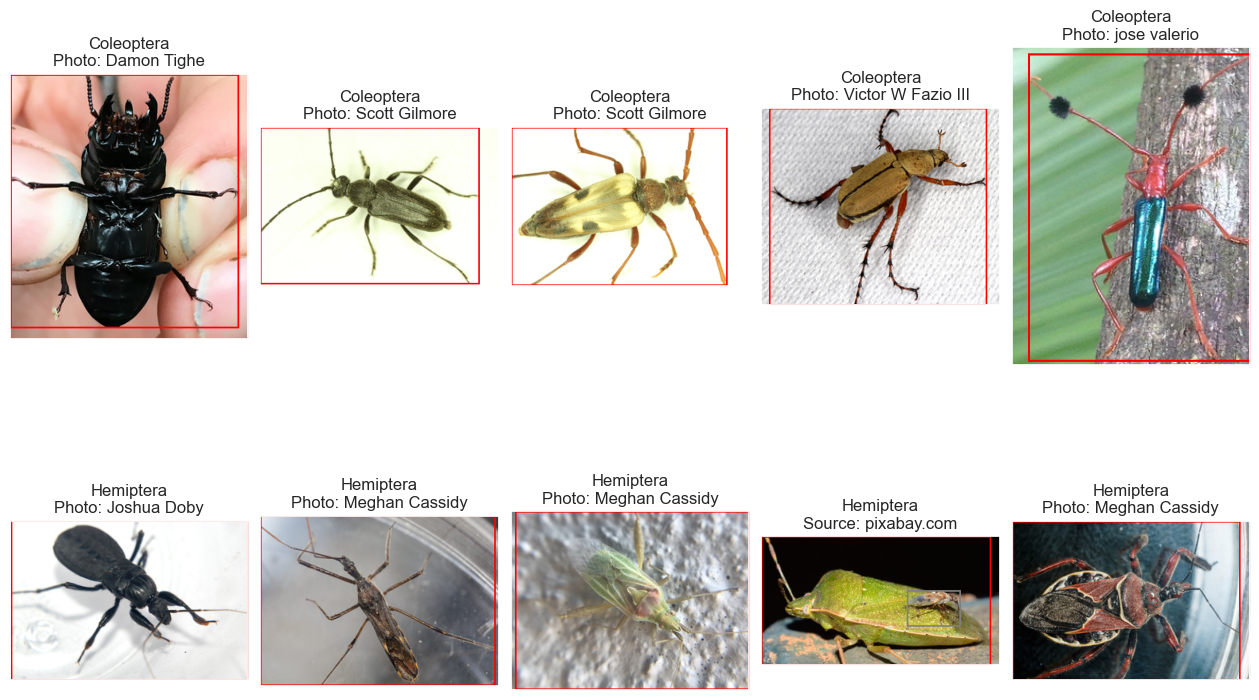

In [77]:
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

top_n = 5

# Thiết lập kích thước và tạo figure
fig = plt.figure(figsize=(16, 10))

# Lặp qua từng label
for i in range(len(labels)):
    # Lọc annotations tương ứng với từng label và chọn top 3 theo diện tích
    ldf = anno[anno.label == labels.name[i]].nlargest(top_n, 'area')
    
    for j in range(len(ldf)):  # Đảm bảo chỉ lặp qua số lượng thực tế (tối đa 3)
        # Tạo subplot cho hàng i và cột j
        axes = fig.add_subplot(len(labels), top_n, 1 + i * top_n + j)
        plot_img(
            axes, 
            anno[anno['id'] == ldf.iloc[j]['id']].sort_values(by=['area'], ascending=False), 
            highlight=True
        )

# Tinh chỉnh khoảng cách giữa các subplots để loại bỏ khoảng trắng
plt.subplots_adjust(wspace=0.05, hspace=0.05)  # Giảm khoảng cách ngang và dọc
plt.show()


For each label, view the images that have the most objects:

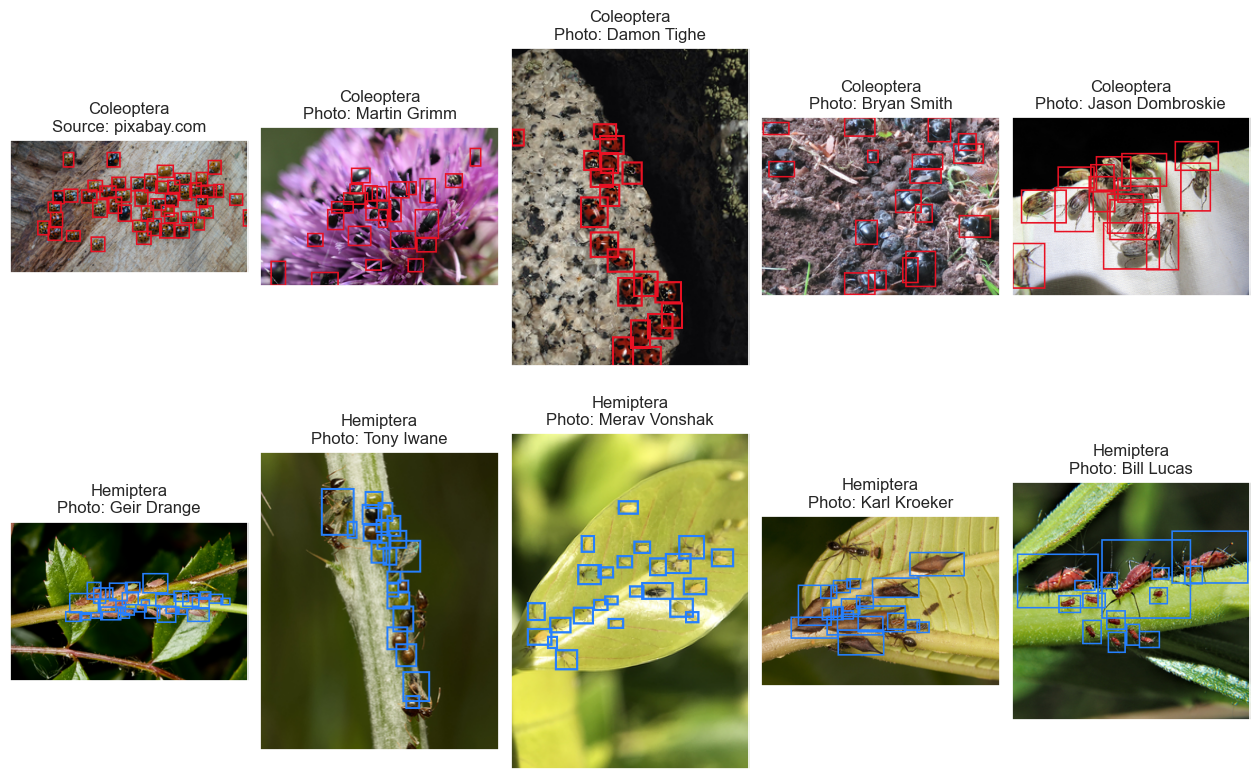

In [88]:
fig = plt.figure(figsize=(16,10))
num_ids = 5
for i in range(len(labels)): 
    # Lấy các ID phổ biến nhất cho mỗi label
    a = anno[anno.label == labels.name[i]]['id'].value_counts()
    top_ids = a.index[:num_ids]
    
    for j, img_id in enumerate(top_ids):
        
        ldf = anno[anno.id == a.index[j]]
        
        axes = fig.add_subplot(len(labels), num_ids, 1 + i * num_ids + j)
        plot_img(axes, 
                anno[anno.id == ldf.iloc[j].id], 
                highlight=False)
        
plt.subplots_adjust(wspace=0.05, hspace=0.05) 
plt.show()

Finally, view some random images (re-run cell for a new selection).

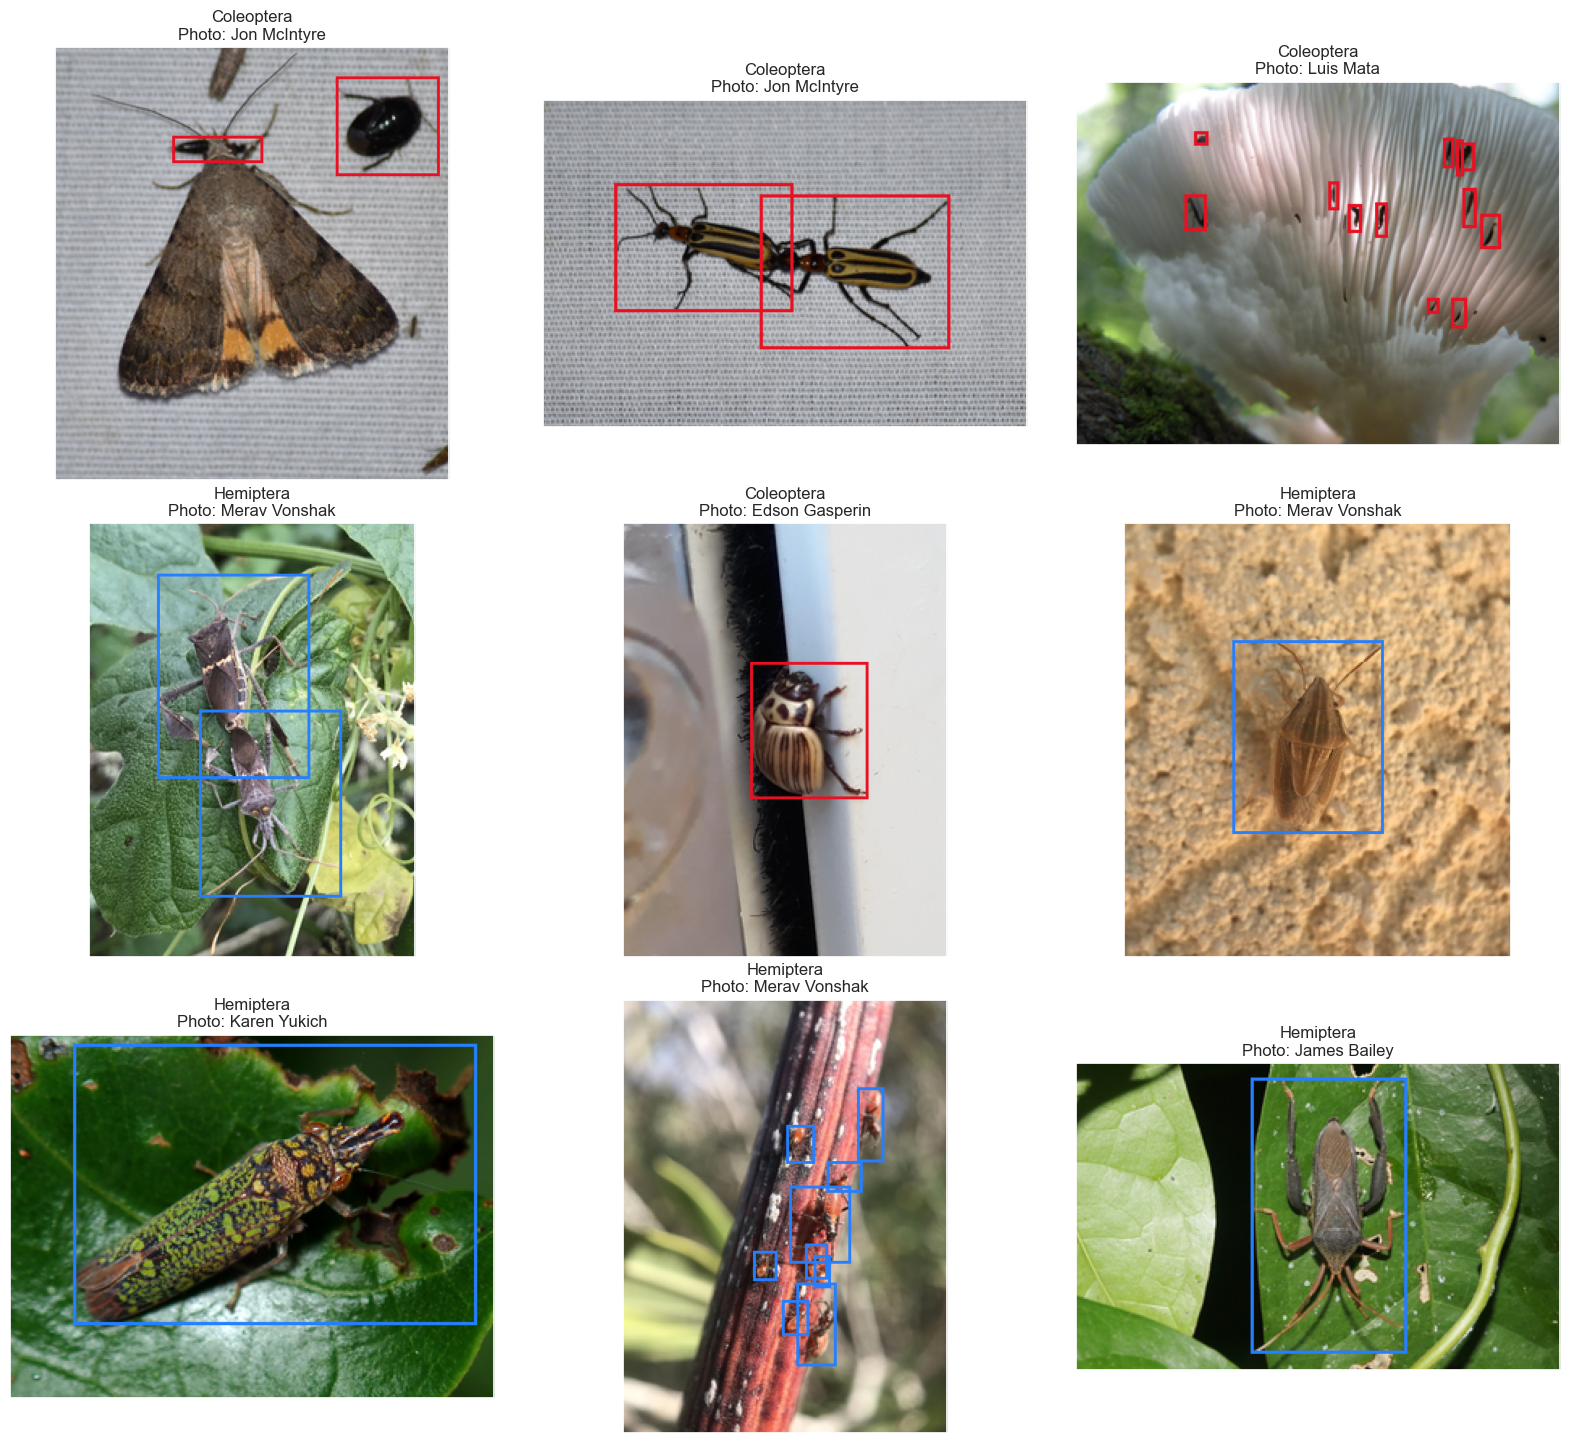

In [90]:
fig = plt.figure(figsize=(20,18))
for i in range (3):
    ldf=anno.sample(n=3)
    for j in range(3):
        axes = fig.add_subplot(3, 3, 1+i*3+j)
        plot_img(axes, anno[anno.id == ldf.iloc[j].id], highlight=False)

### Metadata 

In [34]:
header = ['file', 'label', 'height', 'width', 'left', 'top', 'right', 'bottom'] # change as required
anno.to_csv('../ArTaxOr.csv', index=False, columns = header) 

#### Pascal VOC
Pascal VOC files are xml format, and there is one xml file per image file, with same name.

In [50]:
train[['img_dir', 'img_w', 'img_h',	'x', 'y', 'w', 'h',	'sp_type']].head()

img_dir  img_w  img_h            x            y  \
0  Lepidoptera/e1e8e4ffac23.jpg   5000   3333  1919.365955   157.257627   
1      Odonata/d243bd2c5c26.jpg   2048   1213    89.171292   276.259403   
2  Hymenoptera/4984d11dbcd9.jpg   2848   4272  1045.494253  1501.747126   
3      Diptera/b34499601da3.jpg   2620   1770  1579.944866  1186.876435   
4      Araneae/f4fd8c64f868.jpg   2048   1386   538.129655   173.294151   

             w            h  sp_type  
0  1940.041351  2574.716649        2  
1  1863.777990   807.360258        6  
2   834.758621   712.000000        0  
3   444.190214   435.275510        4  
4   656.772414   768.587156        5

In [38]:
import sys
# !{sys.executable} -m pip install pascal_voc_writer
from pascal_voc_writer import Writer

if not os.path.exists('voc'):
    os.mkdir('voc')

#for i in range(len(df)):
for i in range(10): # use above line for full dataset
    ldf=anno[anno.id == df.id[i]].reset_index()
    p=df.path[i].split('/') 

    width, height = ldf.xres[0], ldf.yres[0]
    writer = Writer(df.path[i], width, height)
    for j in range(len(ldf)):
        writer.addObject(ldf.label[j], 
                            int(ldf.left[j]*width), 
                            int(ldf.top[j]*height), 
                            int(ldf.right[j]*width),
                            int(ldf.bottom[j]*height))
    writer.save('./voc/'+p[1].replace('.jpg','.xml'))
print(os.listdir("./voc"))

['00dd5c620adb.xml', '000887d8cacc.xml', '00600a41bcaf.xml', '0119702c2821.xml', '0036742ac4ec.xml', '010230a13014.xml', '007d652de198.xml', '0087da706cc9.xml', '0054a14fd144.xml', '01326a8ef5c4.xml']


#### Darknet YOLOv3¶
Darknet expects one annotation file per image file. Each object is described by:
class x_center y_center width height

In [39]:
if not os.path.exists('labels'):
    os.mkdir('labels')

#for i in range(len(df)):
for i in range(10): # use above line for full dataset
    ldf=anno[anno.id == df.id[i]].reset_index()
    p=df.path[i].split('/') 
    file=open('./labels/'+p[1].replace('.jpg','.txt'),'w')
    for j in range(len(ldf)):
        l=labels[labels.name == ldf.label[j]].index.to_list()
        file.write('{} {} {} {} {}\n'.format(l[0], ldf.xcenter[j], ldf.ycenter[j], ldf.width[j], ldf.height[j]))
    file.close()
print(os.listdir("./labels"))

['00600a41bcaf.txt', '0119702c2821.txt', '00dd5c620adb.txt', '000887d8cacc.txt', '01326a8ef5c4.txt', '0036742ac4ec.txt', '010230a13014.txt', '007d652de198.txt', '0087da706cc9.txt', '0054a14fd144.txt']
